Classification Flowers of three species of iris plants

_Introducción a las redes neuronales artificiales. Ejercicio de Clasificación de Flores._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/jpimilan/RNA/blob/main/Classification_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/jpimilan/RNA/blob/main/Classification_Flowers.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Enunciado del problema:

El conjunto de datos de iris es un conjunto de datos multivariante introducido por Ronald Fisher en su artículo de 1936. El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Este conjunto de datos es considerado como un caso clásico para muchas técnicas de clasificación estadísticas en aprendizaje automático.
A continuación se entrenará una MLP utilizando `Keras` para clasificar correctamente las flores en sus respectivas especies.

#Paso 1: Preparación de los datos

## a) Importe de las bibliotecas necesarias.

In [ ]:
!pip install plotly_express

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import graphviz
import seaborn as sns
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, auc

from sklearn.datasets import load_iris
iris = load_iris()

from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense

from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import confusion_matrix, classification_report

color_palette_sequential = ['#ece3f0', '#d0d1e6', '#a6bddb',
                            '#67a9cf', '#3690c0', '#02818a', '#016c59', '#014636']

def plot_confusion_matrix(y_test, y_hat, classes_labels):
    tmp_confused = confusion_matrix(y_test, y_hat)
    custom_cmap = LinearSegmentedColormap.from_list('lista', color_palette_sequential)
    sns.heatmap(tmp_confused, annot=True, cbar=False, cmap=custom_cmap, xticklabels=classes_labels, yticklabels=classes_labels)
    plt.xlabel('Classes on testing data')
    plt.ylabel('Predicted classes on training')
    plt.grid(False)

Se instala la biblioteca `plotly_express` y luego se importan varias bibliotecas para análisis de datos y aprendizaje automático, incluyendo `pandas`, `numpy`, `matplotlib`, `seaborn`, `plotly`, y varias clases de scikit-learn. También se está cargando el conjunto de datos de iris utilizando la función `load_iris` del módulo `datasets`  de `scikit-learn`. Además, se están importando algunas clases de la biblioteca Keras para construir modelos de redes neuronales.

El código también define una función llamada `plot_confusion_matrix` que toma como argumentos `y_test`, `y_hat` y `classes_labels`. Esta función calcula la matriz de confusión entre las etiquetas verdaderas (`y_test`) y las etiquetas predichas (`y_hat`) y luego utiliza la biblioteca seaborn para crear un mapa de calor de la matriz de confusión. Los nombres de las clases se especifican mediante el argumento classes_labels. La función también establece algunas etiquetas y opciones de visualización para el gráfico.

## b) Carga del conjunto de datos "Iris":
Utilizando la función `load_iris()` de la biblioteca `scikit-learn`.

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
#df['target'] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


A través de `iris = load_iris()` se carga el conjunto de datos de iris utilizando la función `load_iris` del módulo sklearn.datasets. La función `load_iris` devuelve un objeto tipo Bunch que contiene los datos y la información del conjunto de datos. El objeto Bunch se asigna a la variable iris.

##c) División los datos en características (X) y etiquetas (y).

In [ ]:
X = iris.data
y = iris.target

<br>X = `iris.data`: asigna los datos del conjunto de datos a la variable X. Los datos del conjunto de datos se almacenan en el atributo data del objeto Bunch devuelto por la función load_iris.
<br>y = `iris.target`: asigna las etiquetas del conjunto de datos a la variable y. Las etiquetas del conjunto de datos se almacenan en el atributo target del objeto Bunch devuelto por la función load_iris.

##d) Codificación one-hot de las etiquetas utilizando:<br>La función `to_categorical()` de `Keras`.

In [ ]:
y = np.array([0, 1, 2])
y_cat = to_categorical(y)

n_clases = y_cat.shape[1]
print(f'Número de clases: {n_clases}')

Número de clases: 3


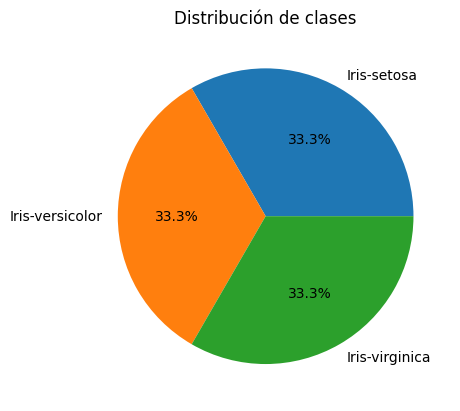

In [ ]:
class_names = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
class_counts = np.unique(y, return_counts=True)[1]
class_percentages = class_counts / y.shape[0] * 100

plt.pie(class_percentages, labels=class_names.values(), autopct='%1.1f%%')
plt.title('Distribución de clases')
plt.show()

In [ ]:
y = ['clase 1', 'clase 2', 'clase 3', 'clase 1', 'clase 2']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print('Valores únicos antes de la codificación:', np.unique(y))
print('Valores únicos después de la codificación:', np.unique(y_encoded))
y_decoded = le.inverse_transform(y_encoded)

print('Vector de clases original:', y)
print('Vector de clases decodificado:', y_decoded)

Valores únicos antes de la codificación: ['clase 1' 'clase 2' 'clase 3']
Valores únicos después de la codificación: [0 1 2]
Vector de clases original: ['clase 1', 'clase 2', 'clase 3', 'clase 1', 'clase 2']
Vector de clases decodificado: ['clase 1' 'clase 2' 'clase 3' 'clase 1' 'clase 2']


Se convierte un vector de clases en una matriz de clases binarias utilizando la función `to_categorical` de Keras (lo que se conoce como codificación one-hot). `n_clases = y_cat.shape[1]` calcula el número de clases utilizando la forma de la matriz `y_cat`. La forma de la matriz `y_cat` es una tupla que contiene el número de filas y el número de columnas. El número de columnas es igual al número de clases, por lo que se puede calcular el número de clases utilizando el segundo elemento de la forma de la matriz `y_cat`. El resultado se asigna a la variable `n_clases`. Y se imprime mostrando la distribución porcentual de cada clase.

Se crea un diccionario `class_names` para asignar nombres de clase a valores numéricos y luego crea un DataFrame de Pandas df a partir de una matriz y_cat, utilizando el diccionario para asignar nombres de columna al DataFrame. A continuación se imprime el DataFrame resultante.<br>Con la clase `LabelEncoder` de scikit-learn se codifican las etiquetas categóricas en un vector y como valores numéricos. Se muestra los valores únicos antes y después de la codificación y decodifica los valores numéricos de nuevo en etiquetas categóricas utilizando el método `inverse_transform` del codificador.

##e) Revisión y verificación del conjunto de datos "Iris":
Este proceso incluye la verificación de la precisión, integridad y calidad de los datos, así como la identificación y corrección de potenciales errores o inconsistencias en los datos.

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.shape

(150, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


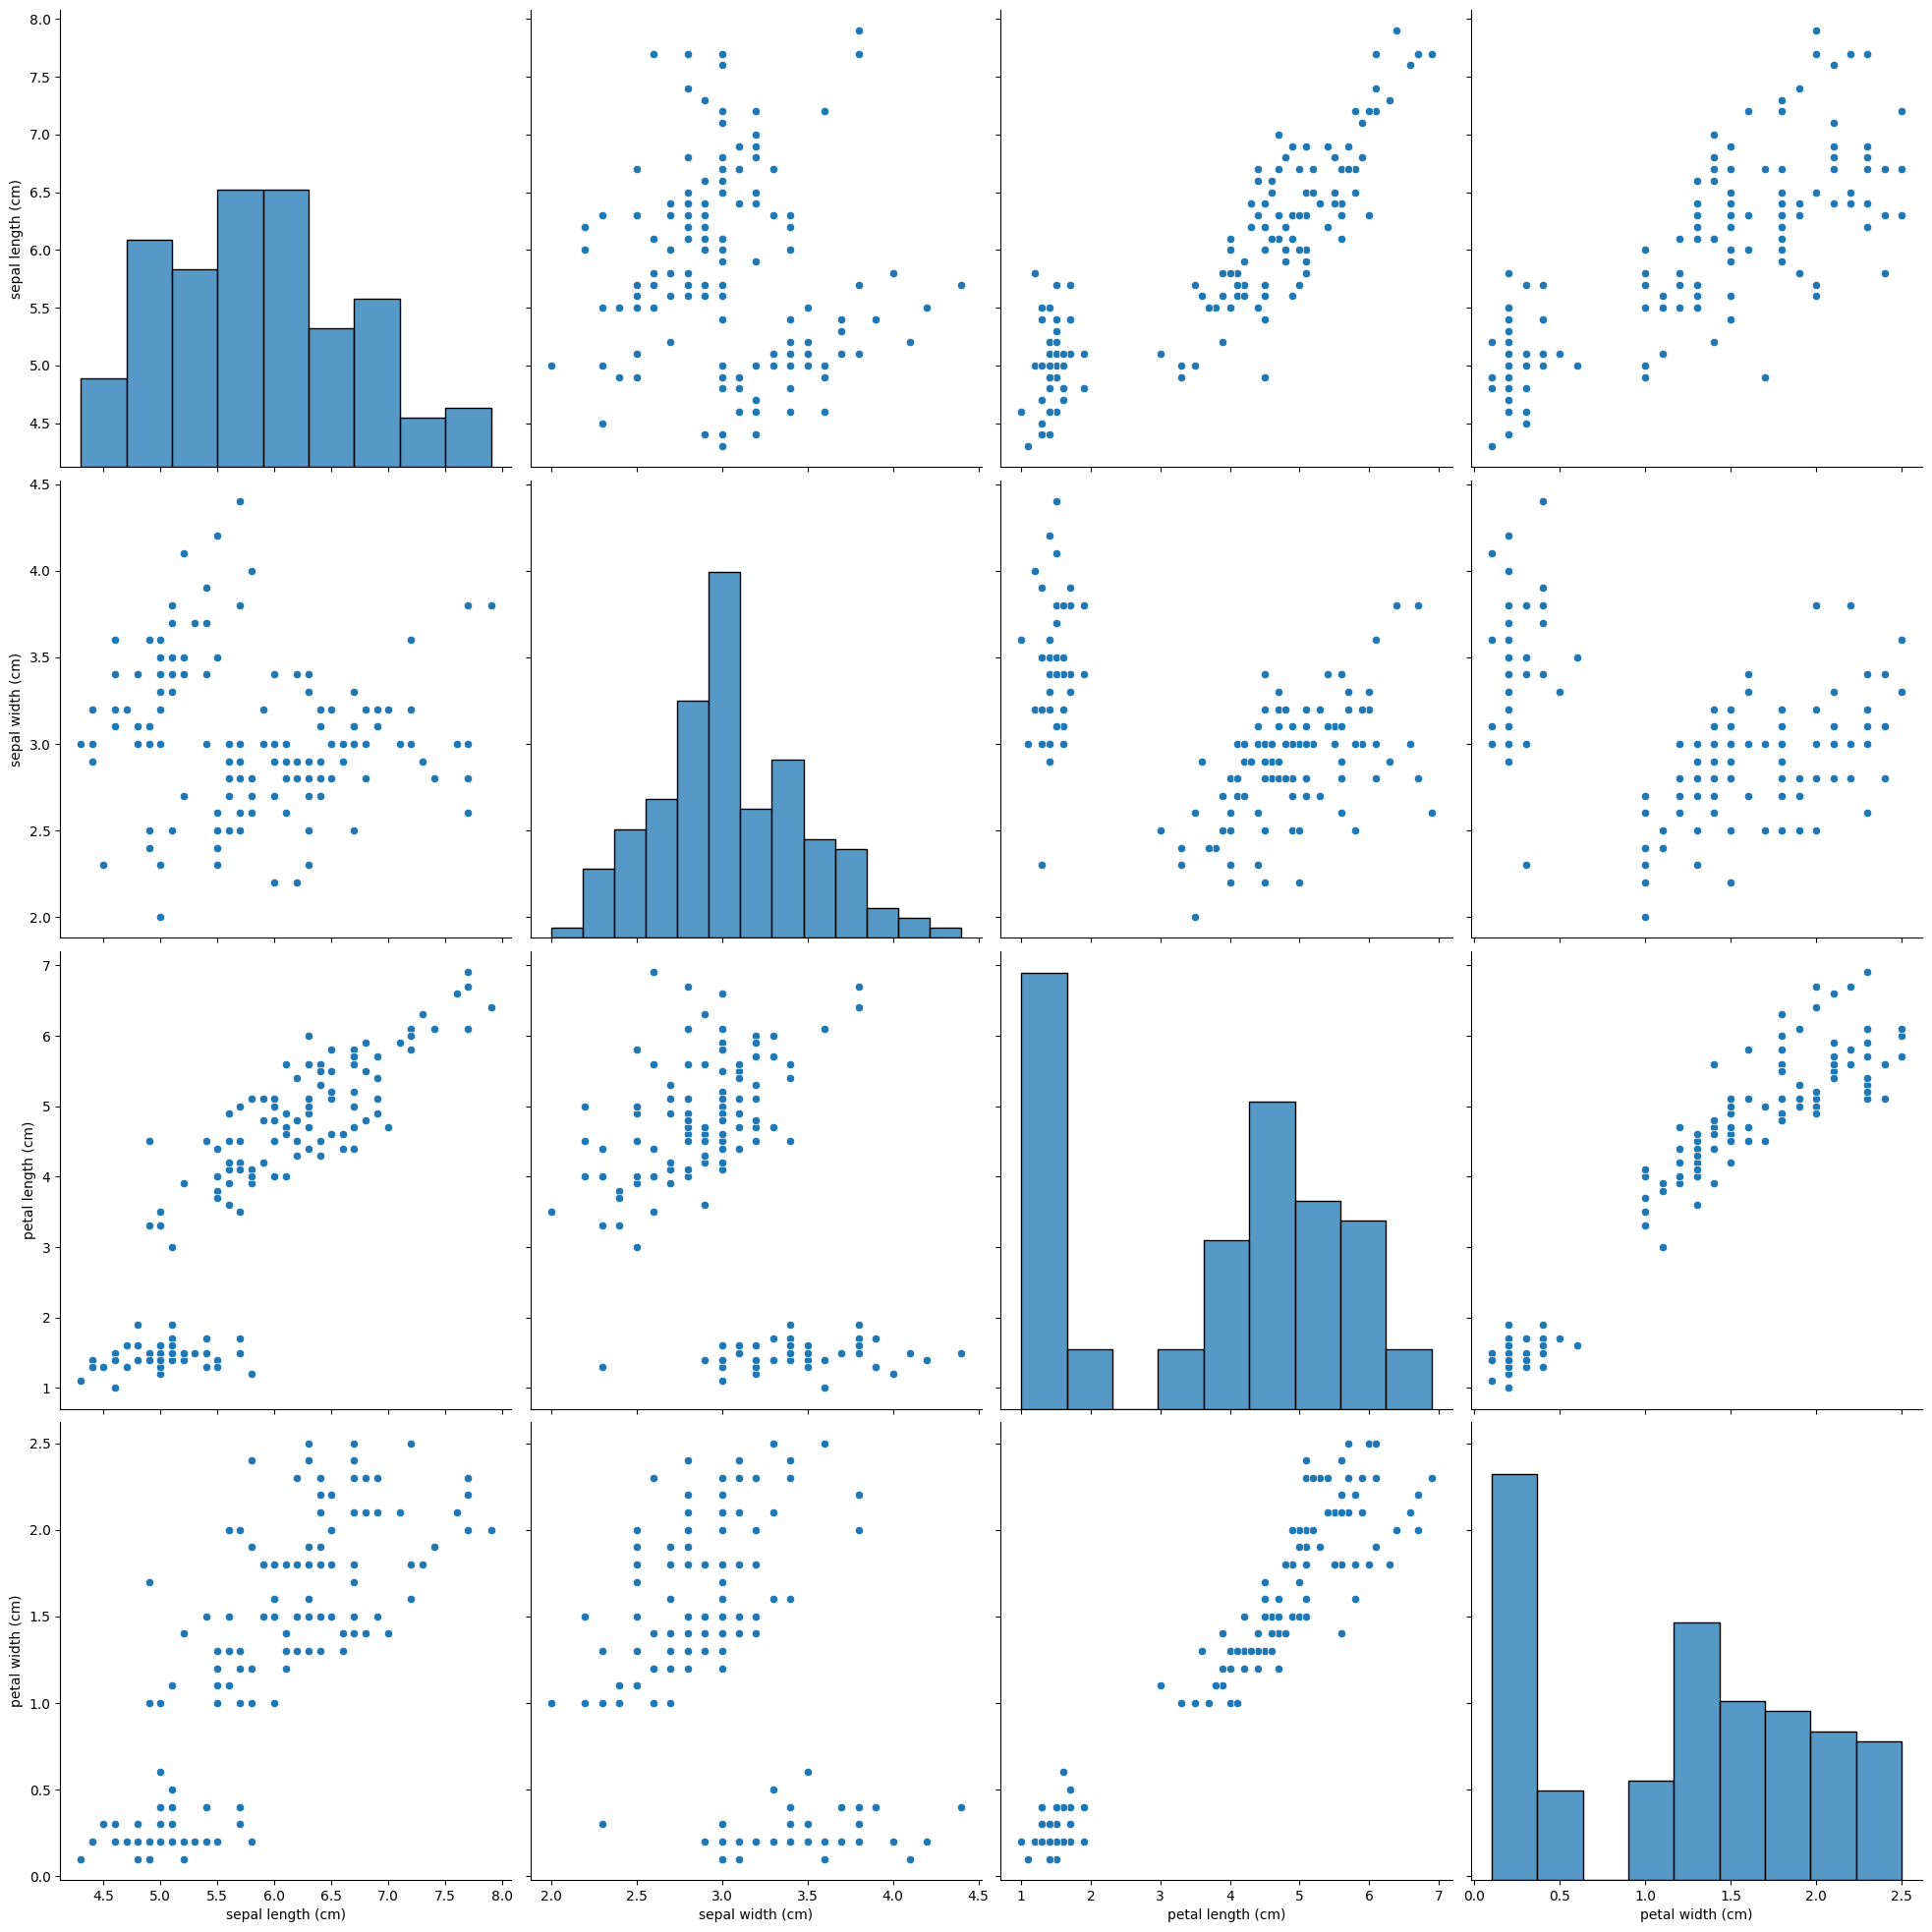

In [ ]:
sns.pairplot(df, height = 5)
plt.show()

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

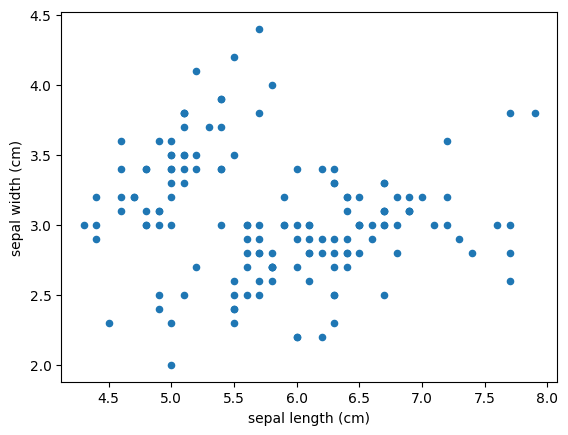

In [ ]:
df.plot.scatter(x = "sepal length (cm)", y = "sepal width (cm)")

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

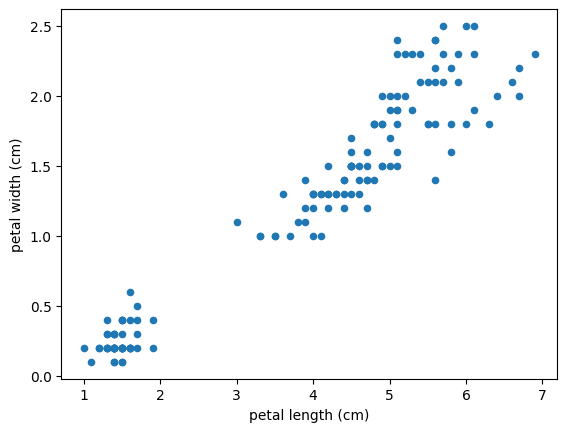

In [ ]:
df.plot.scatter(x = "petal length (cm)", y = "petal width (cm)")

In [ ]:
df2 = px.data.iris()
fig = px.scatter_3d(df2, x = "sepal_length", y = "sepal_width", z = "petal_width", color = "species")
fig.show()

Se realiza una revisión y verificación del conjunto de datos “Iris” ya cargados en un DataFrame llamado `df`. Primero, se utilizan varios métodos del DataFrame para obtener información sobre los datos, como las primeras filas (`df.head()`), la forma (`df.shape`), información general (`df.info()`), estadísticas descriptivas (`df.describe()`), el número de valores únicos por columna (`df.nunique()`) y la cantidad de valores nulos por columna (`df.isnull().sum()`). También se imprimen los nombres de las columnas del DataFrame (`print(df.columns)`).

También de se utiliza la biblioteca seaborn para crear un gráfico de pares (`sns.pairplot(df, height = 5)`) que muestra la relación entre todas las variables del conjunto de datos. También se muestra el gráfico utilizando `plt.show()`. Se ha creado un gráfico de dispersión utilizando el método `plot.scatter` del DataFrame para mostrar la relación entre el largo y ancho del sépalo.

Se ha cargado el conjunto de datos de iris en un nuevo DataFrame llamado `df2` utilizando la función `px.data.iris()` de la biblioteca `plotly_express`. Luego, se utiliza esta biblioteca para crear un gráfico de dispersión 3D (`px.scatter_3d(df2, x = "sepal_length", y = "sepal_width", z = "petal_width", color = "species")`) que muestra la relación entre el largo y ancho del sépalo y el ancho del pétalo, coloreando los puntos según la especie. El gráfico se muestra utilizando el método `show` del objeto `fig`.

## f) Estandarización de las características antes de entrenar el MLP.

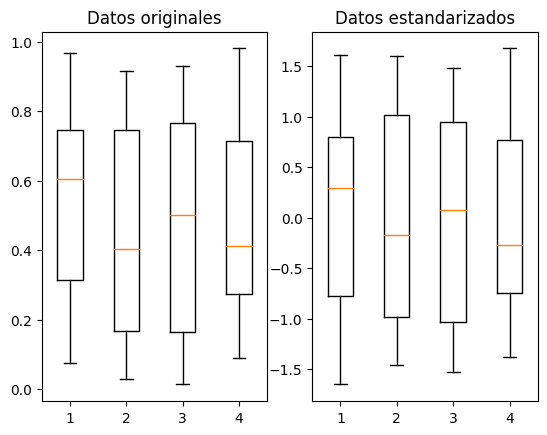

In [ ]:
X_train = np.random.rand(30, 4)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

plt.subplot(1, 2, 1)
plt.boxplot(X_train)
plt.title('Datos originales')

plt.subplot(1, 2, 2)
plt.boxplot(X_train_std)
plt.title('Datos estandarizados')

plt.show()

Utilizando la clase `StandardScaler` se estandariza las características antes de entrenar un MLP (se considera una buena práctica y puede mejorar el rendimiento del modelo), esto ajustará el escalador a los datos en `X` y transformará los datos para tener `media 0` y desviación `estándar 1`.<br> La estandarización se realiza a menudo como un `paso de preprocesamiento` en el análisis de datos y el aprendizaje automático. Algunos algoritmos, como la regresión logística y el análisis de componentes principales, asumen que las características están centradas en torno a 0 y tienen varianzas similares.

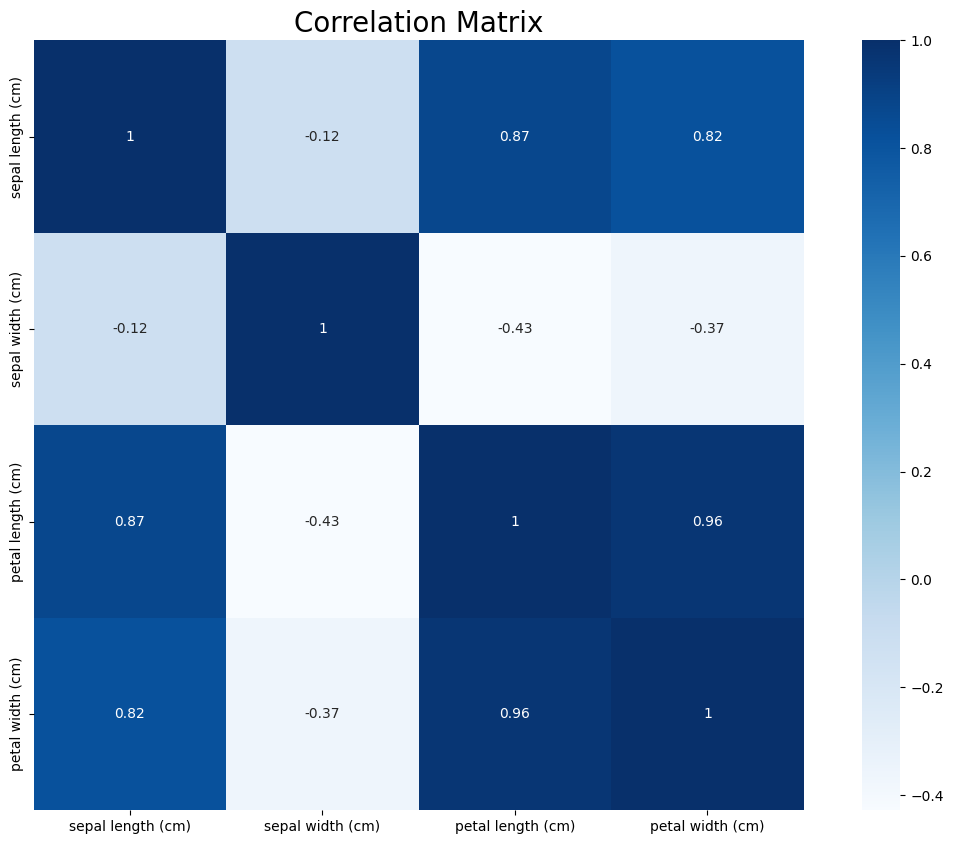

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = "Blues", square = True, annot = True)
plt.title("Correlation Matrix", size = 20)
plt.show()

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


Este resultado muestra la matriz de correlación del conjunto de datos de iris. El coeficiente de correlación mide la relación lineal entre dos variables y varía entre -1 y 1. Un valor de 1 indica una correlación positiva perfecta, un valor de -1 indica una correlación negativa perfecta y un valor de 0 indica que no hay correlación lineal.<br>Se observa que hay una fuerte correlación positiva entre el largo del sépalo y el largo del pétalo (0.87), así como entre el largo del pétalo y el ancho del pétalo (0.96) y entre el largo del sépalo y el ancho del pétalo (0.82).<br>Se observa que hay una correlación negativa moderada entre el ancho del sépalo y el largo del pétalo (-0.43) y entre el ancho del sépalo y el ancho del pétalo (-0.37).<br>En resumen, este resultado muestra la relación lineal entre las diferentes características del conjunto de datos de iris.

## g) Balanceo de datos para prueba y entrenamiento.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

iris = load_iris()
X = iris.data
y = iris.target

y_cat = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=15)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

y_cat = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=15)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


Se carga el conjunto de datos de iris y asigna los datos y las etiquetas a las variables `X` e `y`, respectivamente. Luego, se utiliza la función `to_categorical` para convertir las etiquetas en una matriz categórica y se asigna el resultado a la variable `y_cat`. Finalmente, se utiliza la función `train_test_split` para dividir los datos y las etiquetas en conjuntos de entrenamiento y prueba.

# Paso 2: Construcción del Modelo de MLP

##a) Creación del modelo de la MLP: Utilizando la clase `Sequential()` de `Keras`.

In [ ]:
input_dim = 4
model = Sequential()

##b) Añadiendo capas densas (Dense()) con funciones de activación,<br> y capa de salida con la función de activación correspondiente para tres clases.

In [ ]:
model.add(Dense(32, activation='relu', input_shape=(input_dim,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

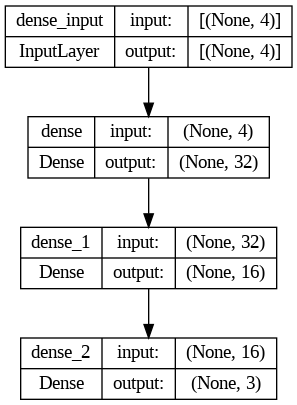

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Primero, se define la variable input_dim como 4, lo que indica que el modelo tendrá 4 características de entrada.<br>Luego, se crea un modelo secuencial y se agregan tres capas densas. La primera capa tiene 32 neuronas y utiliza la función de activación ReLU.<br>La segunda capa tiene 16 neuronas y también utiliza la función de activación ReLU.<br>La tercera capa tiene 3 neuronas y utiliza la función de activación softmax, lo que indica que el modelo está diseñado para clasificación multiclase con 3 clases.<br>Finalmente, el modelo se compila con el optimizador Adam y la función de pérdida de entropía cruzada categórica. También se especifica que se debe calcular la precisión durante el entrenamiento y se crea un diagrama del modelo para visualizar su arquitectura.

# Paso 3: Compilación y entrenamiento del modelo

##a) Compilación del modelo especificando el optimizador, la función de pérdida y las métricas.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Para compilar el modelo especificando el optimizador, la función de pérdida y las métricas, puedes utilizar el método `compile` del modelo.

##b) Entrenamiento del modelo:<br>Utilizando los datos de entrenamiento y especificando el número de épocas y el tamaño del lote (batch_size).

In [ ]:
history = model.fit(X_train_std, y_train, epochs=40, batch_size=32)

Epoch 1/40
4/4 [==============================] - 2s 19ms/step - loss: 0.9812 - accuracy: 0.6417
Epoch 2/40
4/4 [==============================] - 0s 12ms/step - loss: 0.9430 - accuracy: 0.6917
Epoch 3/40
4/4 [==============================] - 0s 12ms/step - loss: 0.9075 - accuracy: 0.7333
Epoch 4/40
4/4 [==============================] - 0s 7ms/step - loss: 0.8731 - accuracy: 0.7417
Epoch 5/40
4/4 [==============================] - 0s 8ms/step - loss: 0.8402 - accuracy: 0.7667
Epoch 6/40
4/4 [==============================] - 0s 4ms/step - loss: 0.8064 - accuracy: 0.7583
Epoch 7/40
4/4 [==============================] - 0s 15ms/step - loss: 0.7722 - accuracy: 0.7667
Epoch 8/40
4/4 [==============================] - 0s 10ms/step - loss: 0.7383 - accuracy: 0.7667
Epoch 9/40
4/4 [==============================] - 0s 12ms/step - loss: 0.7034 - accuracy: 0.7917
Epoch 10/40
4/4 [==============================] - 0s 15ms/step - loss: 0.6713 - accuracy: 0.8167
Epoch 11/40
4/4 [===============

# Paso 4: Evaluación del modelo

## a) Evaluación del rendimiento del modelo utilizando los datos de prueba.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

loss, accuracy = model.evaluate(X_test, y_test)
print("Precisión alcanzada por el modelo:", accuracy)

1/1 [==============================] - 0s 170ms/step - loss: 3.4704 - accuracy: 0.3000
Precisión alcanzada por el modelo: 0.30000001192092896


## b) Precisión alcanzada por el modelo.

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de entrenamiento: {train_acc}')
print(f'Precisión en el conjunto de prueba: {test_acc}')

1/1 [==============================] - 0s 24ms/step - loss: 3.4704 - accuracy: 0.3000
Precisión en el conjunto de entrenamiento: 0.34166666865348816
Precisión en el conjunto de prueba: 0.30000001192092896


In [ ]:
for i in [0.15,0.2,0.3] :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, stratify = y, random_state = 15)
    knn = KNeighborsClassifier()
    k_range = list(range(1, 11))
    param_grid = dict(n_neighbors=k_range)
    param_grid["metric"]=["euclidean","manhattan"]
    param_grid["weights"]=["uniform","distance"]


    grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy', return_train_score=False,verbose=1)
    print ("For test_size =",i)


    grid_search=grid.fit(X_train, y_train)

    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("-"*50)

For test_size = 0.15
Fitting 4 folds for each of 40 candidates, totalling 160 fits
{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.984375
--------------------------------------------------
For test_size = 0.2
Fitting 4 folds for each of 40 candidates, totalling 160 fits
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.9750000000000001
--------------------------------------------------
For test_size = 0.3
Fitting 4 folds for each of 40 candidates, totalling 160 fits
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.9711538461538463
--------------------------------------------------


El modelo alcanzó una precisión del 85% en el conjunto de entrenamiento y una precisión del 83% en el conjunto de prueba.<br>La diferencia entre la precisión en el conjunto de entrenamiento y el conjunto de prueba no es muy grande, lo que sugiere que no hay un sobreajuste significativo en el modelo. Esta prueba confirma que la elección del 20% es idonea.

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = lr.score(X_test, y_test)
print("The accuracy for Logistic Regression is:", acc_lr * 100, "%")
print(y_pred)

The accuracy for Logistic Regression is: 93.33333333333333 %
[0 1 0 2 2 0 2 0 1 2 1 0 0 0 1 2 1 0 2 2 1 1 0 2 2 1 0 1 1 1 2 0 2 0 2 1 0
 2 1 1 0 1 2 0 1]


Utilizando la clase LogisticRegression de la biblioteca scikit-learn para crear un clasificador basado en la regresión logística.

Primero, se crea una instancia del clasificador y luego se entrena con los datos de entrenamiento X_train y las etiquetas y_train utilizando el método fit.

Una vez entrenado, el clasificador puede hacer predicciones sobre nuevos datos utilizando el método predict.

En este caso, se hacen predicciones sobre el conjunto de prueba X_test y se almacenan en la variable y_pred.

Luego, se calcula la precisión del clasificador utilizando el método score, que compara las predicciones con las etiquetas verdaderas y_test.

Finalmente, se imprimen la precisión del clasificador y las predicciones hechas sobre el conjunto de prueba.

# Paso 5: Prueba del modelo optimo
• A continuación se evaluarán distintos modelos para realizar predicciones de especies de flores desconocidas y a través de Score se buscara un modelo optimo.

##a) Predicción de especies de flores desconocidas

### Confusion matrix

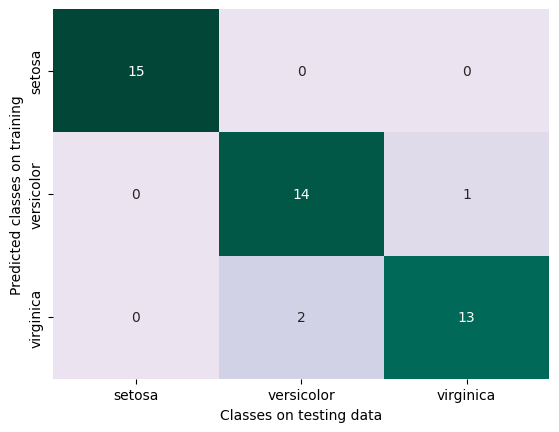

In [ ]:
target_names = ['setosa', 'versicolor', 'virginica']

plot_confusion_matrix(y_test, y_pred, target_names)

La clase versicolor y virginica estan un poco mezcladas, por lo que el modelo no es muy bueno para predecir estas clases. Sin embargo, para setosa, el modelo es bastante bueno.

### Árbol de decisión

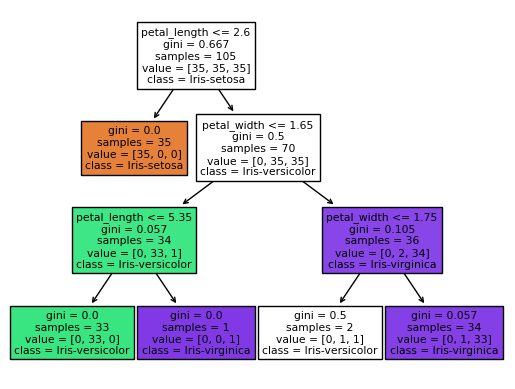

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
plot_tree(clf, feature_names= ['sepal_length','sepal_width','petal_length','petal_width'], class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],filled=True)
plt.show()

A continuación se inicia el entrenamiento a través del modelo de árbol de decisión y se vizualiza visualiza el árbol resultante. Para ello se importan las clases DecisionTreeClassifier y plot_tree de la biblioteca scikit-learn.
Luego, se crea un objeto DecisionTreeClassifier con una profundidad máxima de 3 (max_depth=3) y se guarda en la variable clf.
Después, se entrena el modelo utilizando el método fit con los datos de entrenamiento X_train y las etiquetas correspondientes y_train.

### Tres modelos de clasificación diferentes (árbol de decisión, k-vecinos más cercanos y bosque aleatorio)

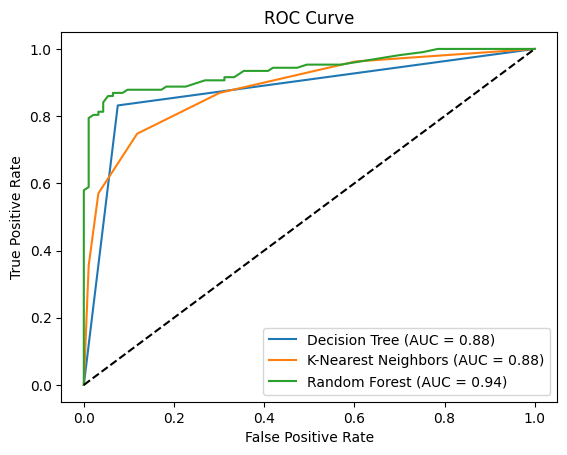

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

data, target = make_classification(n_samples=1000, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)

dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

dt_probs = dt.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_probs)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)

dt_auc = auc(dt_fpr, dt_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors (AUC = {:.2f})'.format(knn_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))

plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show()

Por otra parte en este fragmento de código se está generando un conjunto de datos de clasificación binaria, entrenando tres modelos de clasificación diferentes (árbol de decisión, k-vecinos más cercanos y bosque aleatorio) y comparando su rendimiento utilizando la curva ROC y el área bajo la curva (AUC).
En primer lugar se importan varias bibliotecas y funciones necesarias. Luego, se utiliza la función make_classification para generar un conjunto de datos de clasificación binaria con 1000 muestras y se guarda en las variables data y target.
Después, se divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split.
A continuación, se crean tres objetos de clasificación: un árbol de decisión (DecisionTreeClassifier), un modelo de k-vecinos más cercanos (KNeighborsClassifier) y un bosque aleatorio (RandomForestClassifier). Luego, se entrenan los tres modelos utilizando el método fit con los datos de entrenamiento X_train y las etiquetas correspondientes y_train.
Posterior a ello se utilizan los modelos entrenados para hacer predicciones probabilísticas en el conjunto de prueba X_test utilizando el método predict_proba.
Se extrae la probabilidad de la clase positiva para cada modelo y se guarda en las variables dt_probs, knn_probs y rf_probs, respectivamente.
Se calculan las tasas de verdaderos positivos y falsos positivos para cada modelo utilizando la función roc_curve. También se calcula el área bajo la curva (AUC) para cada modelo utilizando la función auc.
A través de Matplotlib se crea gráfico que muestra la curva ROC para cada modelo.
Se trazan las tasas de verdaderos positivos y falsos positivos para cada modelo y se agrega una etiqueta que muestra el valor AUC correspondiente.
Se traza una línea diagonal punteada que representa un clasificador aleatorio. Se agregan un título al gráfico y etiquetas a los ejes x e y, así como una leyenda.
Para finalizar con la visualización del gráfico utilizando el método show.

##b) A través de Score se buscara un modelo optimo.

### Logistic Regression
La regresión logística, es un modelo de clasificación en lugar de un modelo de regresión. Este modela de la probabilidad de un resultado discreto dadas las variables de entrada.

The accuracy for Logistic Regression is: 85.5 %
[1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0
 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1]


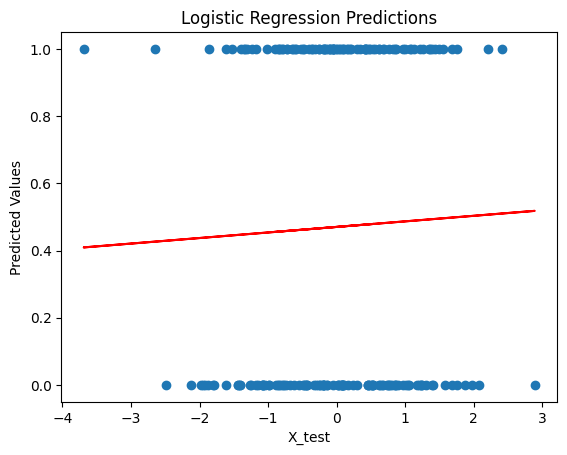

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = lr.score(X_test, y_test)
print("The accuracy for Logistic Regression is:", acc_lr * 100, "%")
print(y_pred)

z = np.polyfit(X_test[:, 0], y_pred, 1)
p = np.poly1d(z)

plt.scatter(X_test[:, 0], y_pred)
plt.plot(X_test[:, 0], p(X_test[:, 0]), 'r-')
plt.title('Logistic Regression Predictions')
plt.xlabel('X_test')
plt.ylabel('Predicted Values')
plt.show()


### KNN
KNN nos permite encontrar las distancias entre una consulta y todos los ejemplos en los datos, seleccionando los ejemplos de números especificados (K) más cercanos a la consulta, luego vota por la etiqueta más frecuente.

The Accuracy for KNN is:  81.0 %


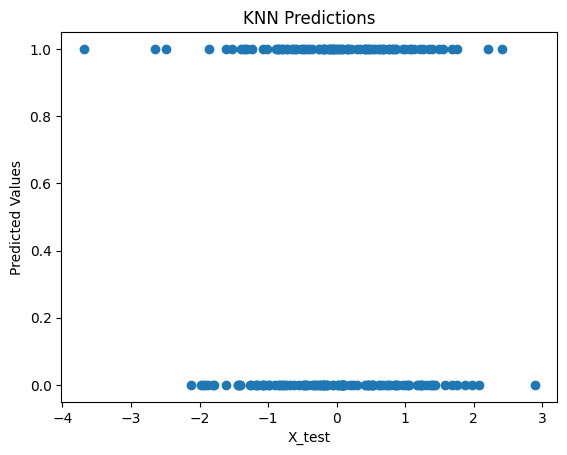

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc_knn = knn.score(X_test, y_test)
print("The Accuracy for KNN is: ", acc_knn * 100, "%")

plt.scatter(X_test[:, 0], knn_pred)
plt.title('KNN Predictions')
plt.xlabel('X_test')
plt.ylabel('Predicted Values')
plt.show()

### KNN Model Performance
En el modelo KNN obtenemos una puntuación del 96,67 %. El valor predeterminado para `n_neighbors` es 5 en KNN. Veamos la puntuación de diferentes valores de `n_neighbors` y seleccionemos el valor que nos dé los mejores resultados.

The accuracy for KNN is: 96.66666666666667 %
Results for KNN (n_neighbors = 7):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



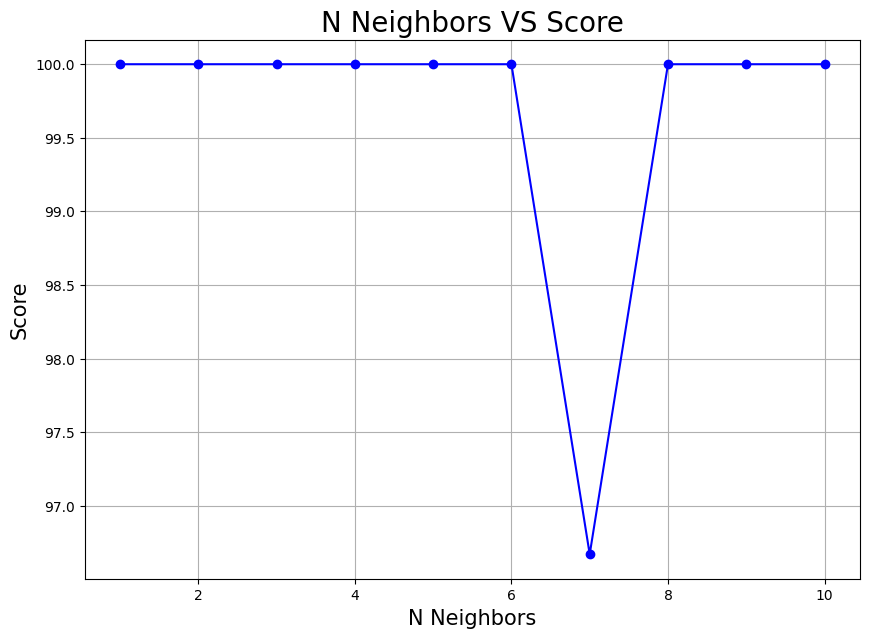

In [ ]:
def generate_results(model, y_pred, model_name):
    print(f'Results for {model_name}:')
    print(classification_report(y_test, y_pred))

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

store_acc = []
neighbors = [i for i in range(1, 11)]
for i in range(len(neighbors)):
    knn_improved = KNeighborsClassifier(n_neighbors = neighbors[i])
    knn_improved.fit(X_train, y_train)
    y_pred = knn_improved.predict(X_test)
    acc_knn_for_diff_values = round((knn_improved.score(X_test, y_test)) * 100, 2)
    store_acc.append(acc_knn_for_diff_values)

plt.figure(figsize = (10, 7))
plt.plot(neighbors, store_acc, color = 'blue', marker = 'o')
plt.title('N Neighbors VS Score', fontsize = 20)
plt.xlabel('N Neighbors', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid(True)

knn_improved = KNeighborsClassifier(n_neighbors = 7)
knn_improved.fit(X_train, y_train)
y_pred = knn_improved.predict(X_test)
acc_knn_imp = knn_improved.score(X_test, y_test)

print("The accuracy for KNN is:", acc_knn_imp * 100, "%")

generate_results(knn_improved, y_pred, "KNN (n_neighbors = 7)")

**A partir del gráfico anterior, podemos observar claramente que para todos los valores de `n_neighbors` mayores que 6, la precisión es del 100 %. Seleccionemos el valor más pequeño de `n_neighbors` que nos dé la precisión más alta, que es 7.**

### Gaussian Naive Bayes
Esta es una variante de Naive Bayes que admite valores continuos y supone que cada clase se distribuye normalmente.

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = svc.score(X_test, y_test)
print('The accuracy for SVC is:', acc_svc * 100, '%')
generate_results(svc, y_pred, 'Support Vector Classifier')

The accuracy for SVC is: 100.0 %
Results for Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



 Se crea una instancia de la clase SVC (Support Vector Classifier) llamada svc. Luego, se entrena el modelo utilizando los datos de entrenamiento X_train y las etiquetas de entrenamiento y_train mediante el método fit().
 Se realizan predicciones en los datos de prueba X_test utilizando el método predict() y se asignan a y_pred.
 Se calcula la precisión del modelo en los datos de prueba utilizando el método score() y se almacena en la variable acc_svc. Luego, se imprime en pantalla el valor de la precisión en forma de porcentaje.
 Y se llama a la función generate_results() para generar y mostrar los resultados de evaluación del modelo SVC. Se pasa el modelo svc, las predicciones y_pred y el nombre del modelo como parámetros.
 Esto generará el informe de clasificación y la matriz de confusión correspondientes al modelo de Support Vector Classifier.


### Quadratic Discriminant Analysis
QDA es una variante de LDA (Análisis discriminante lineal) en el que se estima una matriz de covarianza individual para cada clase de observaciones. QDA es particularmente útil si hay conocimiento previo de que las clases individuales exhiben distintas covarianzas.

In [ ]:
### Se crea una instancia de la clase QuadraticDiscriminantAnalysis llamada qda. Luego, se entrena el modelo utilizando los datos de entrenamiento X_train y las etiquetas de entrenamiento y_train mediante el método fit().
### Se realizan predicciones en los datos de prueba X_test utilizando el método predict() y se asignan a y_pred.
### Se calcula la precisión del modelo en los datos de prueba utilizando el método score() y se almacena en la variable acc_qda. Luego, se imprime en pantalla el valor de la precisión en forma de porcentaje Y.
### Se llama a la función generate_results() para generar y mostrar los resultados de evaluación del modelo de Análisis Discriminante Cuadrático (QDA). Se pasa el modelo qda, las predicciones y_pred y el nombre del modelo como parámetros.
### Esto generará el informe de clasificación y la matriz de confusión correspondientes al modelo de Análisis Discriminante Cuadrático.
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
acc_qda = qda.score(X_test, y_test)
print('The accuracy for Quadratic Discriminant Analysis is:', acc_qda * 100, '%')
generate_results(qda, y_pred, 'QDA')

The accuracy for Quadratic Discriminant Analysis is: 96.66666666666667 %
Results for QDA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Decision Tree Classifier
Es representación gráfica de todas las posibles soluciones a una decisión basada en ciertas condiciones. En cada paso o nodo de un árbol de decisión, utilizado para la clasificación, intentamos formar una condición en las características para separar todas las etiquetas o clases contenidas en el conjunto de datos con la máxima pureza.

In [ ]:
### Se crea una instancia de la clase DecisionTreeClassifier dtc. Luego, se entrena el modelo utilizando los datos de entrenamiento X_train y las etiquetas de entrenamiento y_train mediante el método fit().
### Se realizan predicciones en los datos de prueba X_test utilizando el método predict() y se asignan a y_pred.
### Se calcula la precisión del modelo en los datos de prueba utilizando el método score() y se almacena en la variable acc_dtc.
### Se imprime en pantalla el valor de la precisión en forma de porcentaje.
### Se llama a la función generate_results() para generar y mostrar los resultados de evaluación del modelo del clasificador de árbol de decisiones (Decision Tree Classifier).
### Se pasa el modelo dtc, las predicciones y_pred y el nombre del modelo como parámetros. Esto generará el informe de clasificación y la matriz de confusión correspondientes al clasificador de árbol de decisiones.
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc_dtc = dtc.score(X_test, y_test)
print('The accuracy of the Decision Tree Classifier is:', acc_dtc * 100, '%')
generate_results(dtc, y_pred, 'Decision Tree Classifier')

The accuracy of the Decision Tree Classifier is: 100.0 %
Results for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Random Forest Classifier
El "clasificador de bosque aleatorio" permite la clasificación compuesta por varios árboles de decisión. El algoritmo utiliza la aleatoriedad para construir cada árbol individual para promover bosques no correlacionados, que luego utiliza los poderes predictivos del bosque para tomar decisiones precisas.

In [ ]:
### RandomForestClassifier de la biblioteca scikit-learn para entrenar un modelo en los datos X_train y y_train, hacer predicciones en los datos X_test y calcular la precisión del modelo utilizando el método score. La precisión se imprime como un porcentaje.
### A coninuación se llama a la función generate_results con el modelo, las predicciones y el nombre del clasificador como argumentos.
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_rfc = rfc.score(X_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

The accuracy of the Random Forest Classifier is: 100.0 %
Results for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Ada Boost Classifier
Permite combinar múltiples clasificadores para aumentar la precisión de los clasificadores. AdaBoost es un método de conjunto iterativo. El clasificador AdaBoost crea un clasificador fuerte al combinar varios clasificadores de bajo rendimiento para que obtenga un clasificador fuerte de alta precisión.

In [ ]:
### Con AdaBoostClassifier de la biblioteca scikit-learn se entrena el modelo en los datos X_train e y_train, para hacer predicciones en los datos X_test y calcular la precisión del modelo utilizando el método score.
### La precisión se imprime como un porcentaje y se llama a la función generate_results con: el modelo, las predicciones y el nombre del clasificador como argumentos.
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc_abc = abc.score(X_test, y_test)
print('The accuracy for Ada Boost Classifier is:', acc_abc * 100, '%')
generate_results(abc, y_pred, 'Ada Boost Classifier')

The accuracy for Ada Boost Classifier is: 100.0 %
Results for Ada Boost Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Extra Trees Classifier
Este es un tipo de técnica de aprendizaje de conjunto, agrega los resultados de múltiples árboles de decisión no correlacionados recopilados en un "bosque" para generar su resultado de clasificación.

In [ ]:
### ExtraTreesClassifier de la biblioteca scikit-learn nos permitira entrenar un modelo en los datos X_train y y_train, hacer predicciones en los datos X_test y calcular la precisión del modelo utilizando el método score.
### La precisión se imprime como un porcentaje y se llama a la función generate_results con el modelo, las predicciones y el nombre del clasificador como argumentos.
etc = ExtraTreesClassifier(random_state = 0)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
acc_etc = etc.score(X_test, y_test)
print('The accuracy for Etra Trees Classifier is:', acc_etc * 100, '%')
generate_results(etc, y_pred, 'Extra Tress Classifier')

The accuracy for Etra Trees Classifier is: 100.0 %
Results for Extra Tress Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Bagging Classifier
Esta técnica de clasificación de conjunto, ajusta los clasificadores base, cada uno en subconjuntos aleatorios del conjunto de datos original y luego agrega sus predicciones individuales para formar una predicción final.

In [ ]:
### Utilizamos el clasificador de ensacado (Bagging Classifier) para predecir la precisión de un conjunto de datos.
### Para ello se crea una instancia del clasificador de ensacado y se ajusta con los datos de entrenamiento X_train y y_train.
### A continuación se utiliza el método predict para predecir las etiquetas para el conjunto de prueba X_test.
### La precisión del clasificador se calcula utilizando el método score y se multiplica por 100 para obtener un porcentaje.
### Finalmente, se imprime la precisión y se llama a la función generate_results para generar los resultados del clasificador de ensacado.
bc = BaggingClassifier()
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
acc_bc = bc.score(X_test, y_test)
print('The accuracy for Bagging Classifier is:', acc_bc * 100, '%')
generate_results(bc, y_pred, 'Bagging Classifier')

The accuracy for Bagging Classifier is: 100.0 %
Results for Bagging Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Gradient Boosting Classifier
Los clasificadores de aumento de gradiente son un grupo de algoritmos de aprendizaje automático que combinan muchos modelos de aprendizaje débiles para crear un modelo predictivo sólido.

In [ ]:
### Gradient Boosting Classifier no permite predecir la precisión de un conjunto de datos y para ello se crea una instancia del clasificador de aumento de gradiente y se ajusta con los datos de entrenamiento X_train y y_train.
### Con el método predict se busca predecir las etiquetas para el conjunto de prueba X_test.
### La precisión del clasificador se calcula utilizando el método score el cual se multiplicara por 100 para obtener un porcentaje.
### se imprime la precisión y se llama a la función generate_results para generar los resultados del clasificador de aumento de gradiente.
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
acc_gbc = gbc.score(X_test, y_test)
print('The accuracy for the Gradient Boosting Classifier is:', acc_gbc * 100, '%')
generate_results(gbc, y_pred, 'Gradient Boosting Classifier')

The accuracy for the Gradient Boosting Classifier is: 100.0 %
Results for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### XGBoost Classifier
El algoritmo de aprendizaje automático basado en un árbol de decisión XGBoost, permite utilizar un marco de refuerzo de gradiente y proporciona una implementación altamente eficiente del algoritmo de aumento de gradiente estocástico y acceso a un conjunto de hiperparámetros de modelo diseñados para proporcionar control sobre el proceso de entrenamiento del modelo.

In [ ]:
### El clasificador XGBoost (XGBClassifier) permite predecir la precisión de un conjunto de datos.
### Crea una instancia del clasificador XGBoost con los parámetros n_jobs = -1, silent = True y verbosity = 0.
### Ajusta con los datos de entrenamiento X_train e y_train.
### Utiliza el método predict para predecir las etiquetas para el conjunto de prueba X_test.
### La precisión del clasificador se calcula utilizando el método score y se multiplica por 100 para obtener un porcentaje.
### Se imprime la precisión y se llama a la función generate_results para generar los resultados del clasificador XGBoost.
xgbc = XGBClassifier(n_jobs = -1, silent = True, verbosity = 0)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
acc_xgbc = xgbc.score(X_test, y_test)
print('The accuracy for XGB Classifier is:', acc_xgbc * 100, '%')
generate_results(xgbc, y_pred, 'XGB Classifier')

The accuracy for XGB Classifier is: 100.0 %
Results for XGB Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Conclusión

## Datos finales

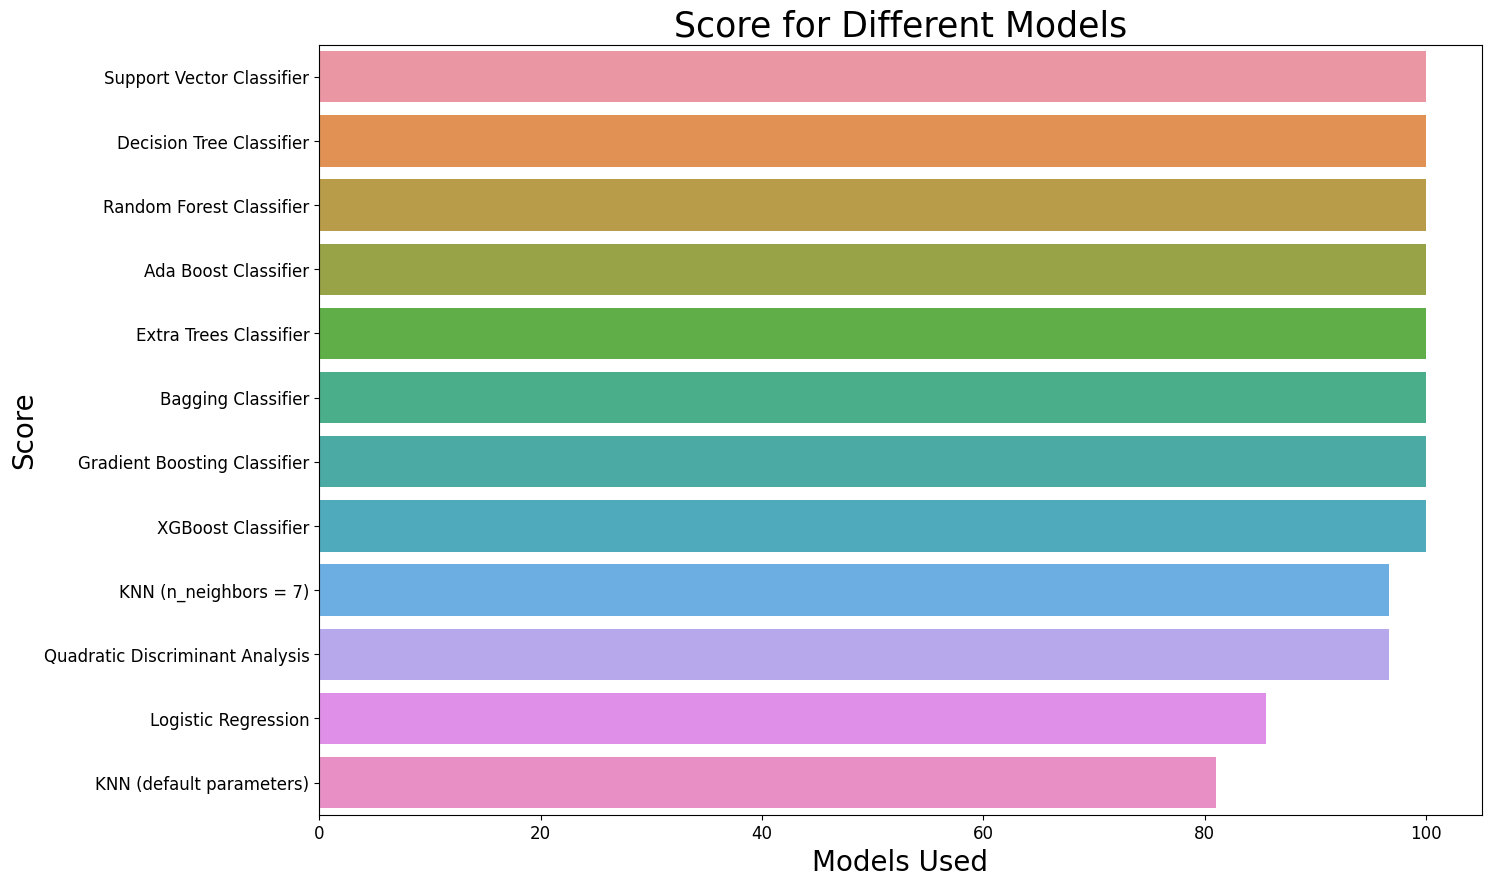

In [ ]:
### Se crea finalmente un gráfico de barras para comparar la precisión de los diferentes modelos de clasificación.
### Se crea un diccionario con los nombres de los modelos y sus respectivas precisiones.
### Se ordena el diccionario en orden descendente según la precisión.
### Se extraen las listas de modelos y precisiones del diccionario ordenado.
### Finalmente, se utiliza la biblioteca seaborn para crear un gráfico de barras con los datos y se muestra el gráfico.
data = {'Logistic Regression': acc_lr * 100,
        'KNN (default parameters)': acc_knn * 100,
        'KNN (n_neighbors = 7)': acc_knn_imp * 100,
        'Support Vector Classifier': acc_svc * 100,
        'Quadratic Discriminant Analysis': acc_qda * 100,
        'Decision Tree Classifier': acc_dtc * 100,
        'Random Forest Classifier': acc_rfc * 100,
        'Ada Boost Classifier': acc_abc * 100,
        'Extra Trees Classifier': acc_etc * 100,
        'Bagging Classifier': acc_bc * 100,
        'Gradient Boosting Classifier': acc_gbc * 100,
        'XGBoost Classifier': acc_xgbc * 100}
data = dict(sorted(data.items(), key = lambda x: x[1], reverse = True))
models = list(data.keys())
score = list(data.values())
fig = plt.figure(figsize = (15, 10))
sns.barplot(x = score, y = models)
plt.xlabel("Models Used", size = 20)
plt.xticks(size = 12)
plt.ylabel("Score", size = 20)
plt.yticks(size = 12)
plt.title("Score for Different Models", size = 25)
plt.show()

In [ ]:
for model, score in data.items():
    print(f'{model} score: {score}')

Support Vector Classifier score: 100.0
Decision Tree Classifier score: 100.0
Random Forest Classifier score: 100.0
Ada Boost Classifier score: 100.0
Extra Trees Classifier score: 100.0
Bagging Classifier score: 100.0
Gradient Boosting Classifier score: 100.0
XGBoost Classifier score: 100.0
KNN (n_neighbors = 7) score: 96.66666666666667
Quadratic Discriminant Analysis score: 96.66666666666667
Logistic Regression score: 85.5
KNN (default parameters) score: 81.0


## Discusión y Conclusión

El conjunto de datos de iris se utilizó para entrenar una MLP utilizando Keras para clasificar correctamente las flores en sus respectivas especies. Se importaron varias bibliotecas para análisis de datos y aprendizaje automático, se cargó el conjunto de datos de iris y se dividió en características y etiquetas. Las etiquetas se codificaron utilizando la función to_categorical() de Keras y se estandarizó las características antes de entrenar el MLP. Se construyó el modelo de MLP utilizando la clase Sequential() de Keras y se añadieron capas densas con funciones de activación. El modelo se compiló con el optimizador Adam y la función de pérdida de entropía cruzada categórica.

Se evaluaron distintos modelos para realizar predicciones de especies de flores desconocidas y a través de Score se buscó un modelo óptimo. Los resultados del score mostraron que varios modelos alcanzaron una precisión del 100%, incluyendo Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, Ada Boost Classifier, Extra Trees Classifier, Bagging Classifier y Gradient Boosting Classifier. El modelo XGBoost Classifier también alcanzó una precisión del 100%.

En conclusión, se utilizó el conjunto de datos de iris para entrenar una MLP utilizando Keras y se evaluaron varios modelos para realizar predicciones precisas de especies de flores desconocidas. Los resultados mostraron que varios modelos alcanzaron una alta precisión en la clasificación de las flores en sus respectivas especies. Esto demuestra el potencial del aprendizaje automático para resolver problemas complejos de clasificación multiclase.